# **Random Forest - Credit Default Prediction**

In this lab, we will build a random forest model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.

<hr>

### **Data Understanding and Cleaning**

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving credit-card-default.csv to credit-card-default.csv


In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

<hr>

### **Data Preparation and Model Building**

In [5]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [6]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### **Default Hyperparameters**
Let's first fit a random forest model with default hyperparameters.

In [7]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [8]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
# Making predictions
predictions = rfc.predict(X_test)

In [10]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [11]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [12]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6666  392]
 [1244  698]]


In [13]:
print(accuracy_score(y_test,predictions))

0.8182222222222222


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### **Hyperparameter Tuning**

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

<hr>

### **Tuning max_depth**

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [17]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [18]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.083835,0.183377,0.040991,0.008353,2,{'max_depth': 2},0.800476,0.799048,0.800714,0.795238,0.798095,0.798714,0.001984,4,0.799167,0.797262,0.801012,0.801786,0.800774,0.800000,0.001613
1,2.332776,0.017790,0.051806,0.001219,7,{'max_depth': 7},0.815238,0.821905,0.815714,0.814048,0.818571,0.817095,0.002827,1,0.830536,0.830476,0.832321,0.831548,0.831905,0.831357,0.000737
2,3.574506,0.016650,0.075204,0.001432,12,{'max_depth': 12},0.815714,0.817619,0.820000,0.813095,0.817381,0.816762,0.002287,2,0.883750,0.884226,0.884881,0.887440,0.885595,0.885179,0.001290
3,4.470841,0.015957,0.094342,0.000559,17,{'max_depth': 17},0.814286,0.815238,0.819762,0.812381,0.814048,0.815143,0.002486,3,0.927738,0.930774,0.930714,0.930893,0.928274,0.929679,0.001377


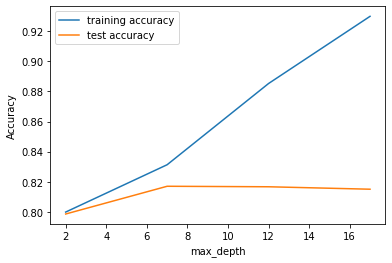

In [19]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### **Tuning n_estimators**

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [23]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [24]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.719806,0.297085,0.046382,0.009187,100,{'n_estimators': 100},0.810476,0.812619,0.808810,0.805238,0.808810,0.809190,0.002422,4,0.810952,0.810595,0.810476,0.811726,0.813333,0.811417,0.001053
1,7.542740,0.023968,0.188267,0.004585,500,{'n_estimators': 500},0.811905,0.813571,0.811190,0.805238,0.807143,0.809810,0.003113,2,0.811429,0.810179,0.811964,0.813333,0.813036,0.811988,0.001140
2,13.665094,0.262623,0.339682,0.005943,900,{'n_estimators': 900},0.811429,0.813571,0.811190,0.805000,0.808095,0.809857,0.002991,1,0.811369,0.810238,0.811607,0.812857,0.812619,0.811738,0.000941
3,19.772873,0.507699,0.484232,0.006352,1300,{'n_estimators': 1300},0.811190,0.813571,0.811429,0.805000,0.806905,0.809619,0.003164,3,0.811310,0.810060,0.811548,0.812440,0.812500,0.811571,0.000891


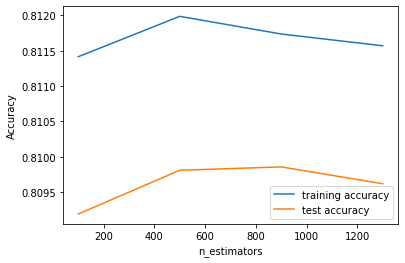

In [25]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

### **Tuning max_features**

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [27]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [28]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.507468,0.026703,0.041318,0.002067,4,{'max_features': 4},0.810714,0.815000,0.810476,0.806667,0.806190,0.809810,0.003199,5,0.811250,0.810417,0.811488,0.813333,0.811071,0.811512,0.000978
1,2.593823,0.018899,0.040764,0.002330,8,{'max_features': 8},0.817857,0.821429,0.819762,0.816429,0.818571,0.818810,0.001697,1,0.821548,0.820774,0.821845,0.822738,0.821786,0.821738,0.000629
2,4.251692,0.020572,0.041243,0.002890,14,{'max_features': 14},0.817381,0.821667,0.818810,0.815952,0.817381,0.818238,0.001938,4,0.821369,0.821131,0.821905,0.822500,0.822500,0.821881,0.000564
3,5.943462,0.026697,0.040187,0.000881,20,{'max_features': 20},0.818333,0.821429,0.820000,0.814762,0.818571,0.818619,0.002225,2,0.822738,0.821667,0.821964,0.822976,0.821964,0.822262,0.000504
4,7.016097,0.010519,0.039823,0.000497,24,{'max_features': 24},0.817619,0.822143,0.819286,0.815476,0.817619,0.818429,0.002216,3,0.823036,0.821667,0.821845,0.823274,0.822321,0.822429,0.000635


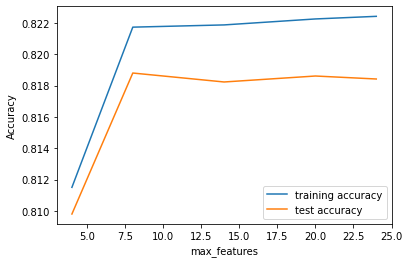

In [29]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### **Tuning min_samples_leaf**

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [30]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [31]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.011517,0.426235,0.062998,0.000841,100,{'min_samples_leaf': 100},0.814524,0.817857,0.817619,0.808333,0.809524,0.813571,0.003987,1,0.817500,0.816667,0.819405,0.816012,0.813929,0.816702,0.001795
1,2.510589,0.021104,0.058965,0.001417,150,{'min_samples_leaf': 150},0.813571,0.816905,0.809524,0.805476,0.808333,0.810762,0.004025,2,0.814583,0.814345,0.810476,0.811905,0.813810,0.813024,0.001584
2,2.338048,0.035541,0.055514,0.000615,200,{'min_samples_leaf': 200},0.812143,0.814524,0.810714,0.803571,0.805952,0.809381,0.004034,3,0.811369,0.811012,0.811488,0.810714,0.810179,0.810952,0.000473
3,2.208662,0.022155,0.055919,0.005365,250,{'min_samples_leaf': 250},0.812619,0.811429,0.809524,0.804048,0.806190,0.808762,0.003206,4,0.811012,0.807917,0.811726,0.810714,0.809762,0.810226,0.001316
4,2.080585,0.012772,0.052733,0.000732,300,{'min_samples_leaf': 300},0.806190,0.809286,0.807381,0.804048,0.807381,0.806857,0.001720,5,0.804643,0.806726,0.807321,0.809048,0.809940,0.807536,0.001851


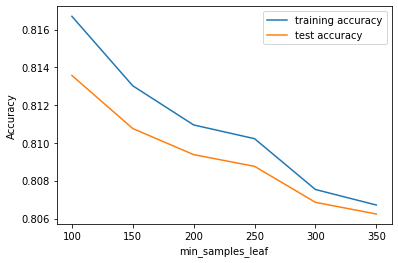

In [32]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### **Tuning min_samples_split**

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [33]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [34]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.948991,0.396196,0.073146,0.002207,200,{'min_samples_split': 200},0.818095,0.822619,0.820952,0.816429,0.818333,0.819286,0.002208,1,0.825179,0.823750,0.823214,0.823750,0.823631,0.823905,0.000667
1,3.595459,0.027466,0.067213,0.001098,250,{'min_samples_split': 250},0.818333,0.822381,0.821667,0.815952,0.817857,0.819238,0.002421,2,0.822619,0.821845,0.822143,0.823214,0.822202,0.822405,0.000474
2,3.479739,0.021572,0.065383,0.000887,300,{'min_samples_split': 300},0.817857,0.821905,0.820952,0.816905,0.817381,0.819000,0.002028,3,0.821905,0.820655,0.821488,0.822202,0.821786,0.821607,0.000528
3,3.547847,0.374531,0.063964,0.001191,350,{'min_samples_split': 350},0.817619,0.823333,0.820714,0.815000,0.817143,0.818762,0.002925,4,0.821905,0.820952,0.821131,0.820774,0.821369,0.821226,0.000392
4,3.277815,0.043942,0.062447,0.001841,400,{'min_samples_split': 400},0.816905,0.820714,0.819762,0.816905,0.817143,0.818286,0.001625,5,0.820298,0.819107,0.821012,0.820893,0.820893,0.820440,0.000712


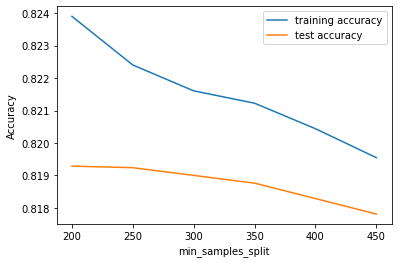

In [35]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

### **Grid Search to Find Optimal Hyperparameters**

We can now find the optimal hyperparameters using GridSearchCV.

In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [37]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [38]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184761904761905 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


### **Fitting the final model with the best parameters obtained from grid search.**

In [39]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [40]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [41]:
# predict
predictions = rfc.predict(X_test)

In [42]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.70      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [44]:
print(confusion_matrix(y_test,predictions))

[[6759  299]
 [1254  688]]


In [45]:
(6753+692)/(6753+692+305+1250)

0.8272222222222222